In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
fraud = pd.read_csv("Fraud_check.csv") #Load csv file

In [24]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [25]:
fraud = fraud.rename(columns={'Marital.Status':"Marital_status",'Taxable.Income':"Taxable_Income",'City.Population':'Population','Work.Experience':'work_ex'})

In [26]:
fraud     #renamed columns

,Undergrad,Marital_status,Taxable_Income,Population,work_ex,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [31]:
fraud = fraud.replace({'NO':0,"YES":1})   #replacing values of yes or no with 0 and 1.

In [32]:
fraud = fraud.reindex(columns=['Taxable_Income','Urban','Undergrad','Marital_status','Population','work_ex']) #In this cell we reordered columns so that we can easily classify features and labels.

In [33]:
fraud #reindexed column so that target column becomes easily accessible.

,Taxable_Income,Urban,Undergrad,Marital_status,Population,work_ex
0,68833,1,0,Single,50047,10
1,33700,1,1,Divorced,134075,18
2,36925,1,0,Married,160205,30
3,50190,1,1,Single,193264,15
4,81002,0,0,Married,27533,28
...,...,...,...,...,...,...
595,76340,1,1,Divorced,39492,7
596,69967,1,1,Divorced,55369,2
597,47334,1,0,Divorced,154058,0
598,98592,0,1,Married,180083,17


In [35]:
dummy = pd.get_dummies(fraud['Marital_status'])

In [36]:
final_df = pd.concat([fraud,dummy],axis=1)

In [37]:
final_df

,Taxable_Income,Urban,Undergrad,Marital_status,Population,work_ex,Divorced,Married,Single
0,68833,1,0,Single,50047,10,0,0,1
1,33700,1,1,Divorced,134075,18,1,0,0
2,36925,1,0,Married,160205,30,0,1,0
3,50190,1,1,Single,193264,15,0,0,1
4,81002,0,0,Married,27533,28,0,1,0
...,...,...,...,...,...,...,...,...,...
595,76340,1,1,Divorced,39492,7,1,0,0
596,69967,1,1,Divorced,55369,2,1,0,0
597,47334,1,0,Divorced,154058,0,1,0,0
598,98592,0,1,Married,180083,17,0,1,0


In [39]:
final_df = final_df.drop(columns=['Marital_status'])

In [40]:
final_df

,Taxable_Income,Urban,Undergrad,Population,work_ex,Divorced,Married,Single
0,68833,1,0,50047,10,0,0,1
1,33700,1,1,134075,18,1,0,0
2,36925,1,0,160205,30,0,1,0
3,50190,1,1,193264,15,0,0,1
4,81002,0,0,27533,28,0,1,0
...,...,...,...,...,...,...,...,...
595,76340,1,1,39492,7,1,0,0
596,69967,1,1,55369,2,1,0,0
597,47334,1,0,154058,0,1,0,0
598,98592,0,1,180083,17,0,1,0


In [41]:
final_df.describe()

,Taxable_Income,Urban,Undergrad,Population,work_ex,Divorced,Married,Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,0.503333,0.520000,108747.368333,15.558333,0.315000,0.323333,0.361667
std,26204.827597,0.500406,0.500017,49850.075134,8.842147,0.464903,0.468139,0.480884
min,10003.000000,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000,0.000000
50%,55074.500000,1.000000,1.000000,106493.500000,15.000000,0.000000,0.000000,0.000000
75%,78611.750000,1.000000,1.000000,150114.250000,24.000000,1.000000,1.000000,1.000000
max,99619.000000,1.000000,1.000000,199778.000000,30.000000,1.000000,1.000000,1.000000


In [43]:
category = pd.cut(final_df.Taxable_Income,bins = [0,30000,100000],labels =['risky','good']) #converting continous variable into categorical.

In [45]:
final_df.insert(0,"classification_Taxable",category)

In [46]:
final_df

,classification_Taxable,Taxable_Income,Urban,Undergrad,Population,work_ex,Divorced,Married,Single
0,good,68833,1,0,50047,10,0,0,1
1,good,33700,1,1,134075,18,1,0,0
2,good,36925,1,0,160205,30,0,1,0
3,good,50190,1,1,193264,15,0,0,1
4,good,81002,0,0,27533,28,0,1,0
...,...,...,...,...,...,...,...,...,...
595,good,76340,1,1,39492,7,1,0,0
596,good,69967,1,1,55369,2,1,0,0
597,good,47334,1,0,154058,0,1,0,0
598,good,98592,0,1,180083,17,0,1,0


In [48]:
final_df['classification_Taxable'].value_counts()

good     476
risky    124
Name: classification_Taxable, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder    #Used Label Encoder

In [50]:
encoding = LabelEncoder()

In [53]:
final_df['classification_Taxable']= encoding.fit_transform(final_df.classification_Taxable)

In [54]:
final_df

,classification_Taxable,Taxable_Income,Urban,Undergrad,Population,work_ex,Divorced,Married,Single
0,0,68833,1,0,50047,10,0,0,1
1,0,33700,1,1,134075,18,1,0,0
2,0,36925,1,0,160205,30,0,1,0
3,0,50190,1,1,193264,15,0,0,1
4,0,81002,0,0,27533,28,0,1,0
...,...,...,...,...,...,...,...,...,...
595,0,76340,1,1,39492,7,1,0,0
596,0,69967,1,1,55369,2,1,0,0
597,0,47334,1,0,154058,0,1,0,0
598,0,98592,0,1,180083,17,0,1,0


In [56]:
final_df['classification_Taxable'].value_counts()

0    476
1    124
Name: classification_Taxable, dtype: int64

In [57]:
final_df = final_df.drop(columns=['Taxable_Income'],axis=1)

In [58]:
final_df

,classification_Taxable,Urban,Undergrad,Population,work_ex,Divorced,Married,Single
0,0,1,0,50047,10,0,0,1
1,0,1,1,134075,18,1,0,0
2,0,1,0,160205,30,0,1,0
3,0,1,1,193264,15,0,0,1
4,0,0,0,27533,28,0,1,0
...,...,...,...,...,...,...,...,...
595,0,1,1,39492,7,1,0,0
596,0,1,1,55369,2,1,0,0
597,0,1,0,154058,0,1,0,0
598,0,0,1,180083,17,0,1,0


In [64]:
labels = final_df.iloc[: ,0]
features =final_df.iloc[: , 1:]

In [155]:
from sklearn.model_selection import train_test_split

In [225]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2) #model validation

In [226]:
from sklearn.tree import DecisionTreeClassifier   #used decision tree classifier.

In [227]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight ='balanced')

In [228]:
model.fit(x_train,y_train)    

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [229]:
model.get_n_leaves()    #leaf node

12

In [230]:
y_pred = model.predict(x_test)

In [231]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [232]:
from sklearn.metrics import classification_report

In [233]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        78
           1       0.36      0.19      0.25        42

    accuracy                           0.60       120
   macro avg       0.51      0.51      0.49       120
weighted avg       0.55      0.60      0.56       120



In [166]:
from sklearn import tree

[Text(141.24375, 195.696, 'X[2] <= 74597.0\nentropy = 1.0\nsamples = 480\nvalue = [240.0, 240.0]'),
 Text(83.7, 152.208, 'X[2] <= 73611.5\nentropy = 0.981\nsamples = 143\nvalue = [76.16, 54.857]'),
 Text(62.775000000000006, 108.72, 'X[2] <= 73478.0\nentropy = 0.987\nsamples = 136\nvalue = [71.68, 54.857]'),
 Text(41.85, 65.232, 'X[2] <= 64532.5\nentropy = 0.983\nsamples = 135\nvalue = [71.68, 52.571]'),
 Text(20.925, 21.744, 'entropy = 0.994\nsamples = 116\nvalue = [60.16, 50.286]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.647\nsamples = 19\nvalue = [11.52, 2.286]'),
 Text(83.7, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 2.286]'),
 Text(104.625, 108.72, 'entropy = -0.0\nsamples = 7\nvalue = [4.48, 0.0]'),
 Text(198.7875, 152.208, 'X[2] <= 141193.5\nentropy = 0.997\nsamples = 337\nvalue = [163.84, 185.143]'),
 Text(146.475, 108.72, 'X[2] <= 140581.0\nentropy = 0.986\nsamples = 196\nvalue = [91.52, 121.143]'),
 Text(125.55000000000001, 65.232, 'X[3] <= 13.5\nentropy = 0.99

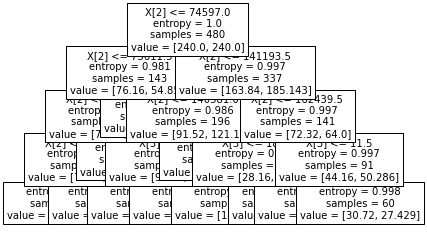

In [167]:
tree.plot_tree(model,fontsize=10)    #tree plot.